# Importing Libraries and dataset

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import matplotlib.cm as cm
import seaborn as sns
from package import utilities as ut
from itertools import chain

C:\Users\Enrico\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Enrico\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Enrico\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
G = nx.read_edgelist('data/348.edges', create_using=nx.Graph(),nodetype= int)
ut.draw_plotly_network(G)

Calculating coordinates
End


# What is the overall structure of the network? ScaleFree


## Network Statisitcs
- Number of nodes and edges?
- Is it connected? Uncconnected mean that An edge traversal starting from a given vertex cannot reach any other vertex.
- Bipartite? The vertices can be partitioned in two independent sets.
- Average degree: The degree of a vertex of a graph specifies the number of edges incident to it

In [3]:
#prit information about grapg
info = nx.info(G)
print(info)
# True if the graph is connected, false otherwise.
connceted = nx.is_connected(G)
print("Network is connected?",connceted)
# Returns True if graph G is bipartite, False if not.
bipartite = nx.is_bipartite(G)
print("Network is bipartite?",bipartite)

Graph with 224 nodes and 3192 edges
Network is connected? True
Network is bipartite? False


- Average Distance? The distance between two vertices represent the shortest path between them.
- What is the diameter?  The diameter of graph is the maximum distance between the pair of vertices.
- Density
- ?? Average degree: Average degree is simply the average number of edges per node in the graph.
- )) Betweeness: 

In [4]:
#calculate avg distance and print
avg_distance = nx.average_shortest_path_length(G)
print("Network Average distance: ", avg_distance)
#calculate diameter and print
diameter = nx.diameter(G, e=None, usebounds=False)
print("Network Diameter: ", diameter)

#avg_degree = sum(dict(G.degree()).values()) / nx.number_of_nodes(G) 
#betweennes = nx.betweenness_centrality(G)

Network Average distance:  2.523462524023062
Network Diameter:  9


In [5]:
centrality = nx.degree_centrality(G)
print(" ")
print("----------Degree centrality----------")
print(" ")
for w in sorted(centrality, key=centrality.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality[w])

centrality_page_rank = nx.pagerank(G)
print(" ")
print("----------PageRank centrality----------")
print(" ")
for w in sorted(centrality_page_rank, key=centrality_page_rank.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality_page_rank[w])


 
----------Degree centrality----------
 
Most influent node:  376  Degree of:  0.4439461883408072
Most influent node:  475  Degree of:  0.3991031390134529
Most influent node:  412  Degree of:  0.39461883408071746
Most influent node:  497  Degree of:  0.36771300448430494
Most influent node:  373  Degree of:  0.34977578475336324
Most influent node:  553  Degree of:  0.33183856502242154
Most influent node:  500  Degree of:  0.3273542600896861
Most influent node:  561  Degree of:  0.3273542600896861
Most influent node:  513  Degree of:  0.3273542600896861
Most influent node:  428  Degree of:  0.32286995515695066
 
----------PageRank centrality----------
 
Most influent node:  376  Degree of:  0.012459526742156673
Most influent node:  475  Degree of:  0.01125504671836014
Most influent node:  412  Degree of:  0.011190493517471074
Most influent node:  563  Degree of:  0.011109563695356374
Most influent node:  373  Degree of:  0.010326801315389447
Most influent node:  497  Degree of:  0.01015

## Network analysis


- Small World phenomenon claims that real networks although are large they have short diameter. This applies for real and virtual social networks (the Milgram experiment).
- Scale Free networks with power-law degree distribution have a skewed population with a few highly-connected nodes (such as social-influences) and a lot of loosely-connected nodes, this is a characteristic of social networks.
- We are going to compare a random graph with our Social Network graph





# Real social network 

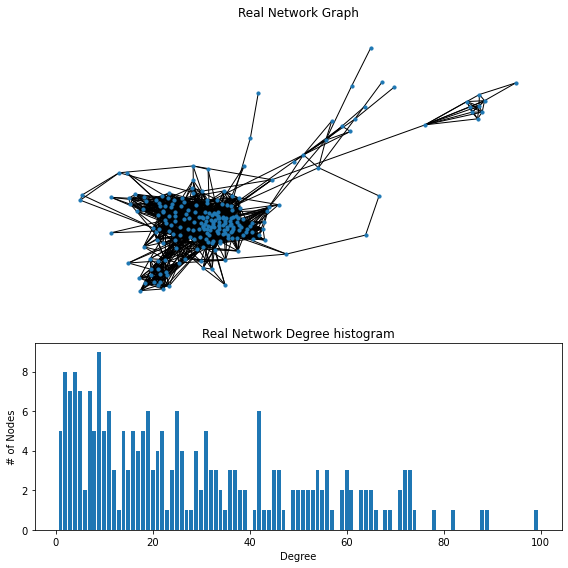

In [6]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot the random graph with spring layout before intializated
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos= pos,with_labels= False, node_size=10)
#set title
ax0.set_title("Real Network Graph")
#do not plot axis on graph
ax0.set_axis_off()
#secondo plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
#create a list with the degree of random graph and sort 
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
#Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Real Network Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

# What are the subgroups and communities in the network?

Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices:

Alghoritm approach:

Step I:
- Initially, all nodes assigned to a different community.
- For each node i consider a neighbour j and evaluate gain in modularity of community if I moves to j’s community.
- Move node i to j’s community which has the largest positive gain.
- Do this for all nodes. Stop when no improvement can be achieved.


Step II:

- Construct a new network whose nodes are the communities identified during Step I.
- The weight of the link between two nodes is the sum of the weight of the links between the nodes in the corresponding communities. Links between nodes of the same community lead to weighted self-loops.
- Repeat Step I and Step II on this network.
- The passes are repeated until there are no more changes and maximum modularity is attained.


In [7]:
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
df_communities = pd.DataFrame(partition, index=[0]).T.reset_index()
df_communities.columns = ["nodes", "communities"]
print("How Many communities are there? ", len(set(values)))


How Many communities are there?  7


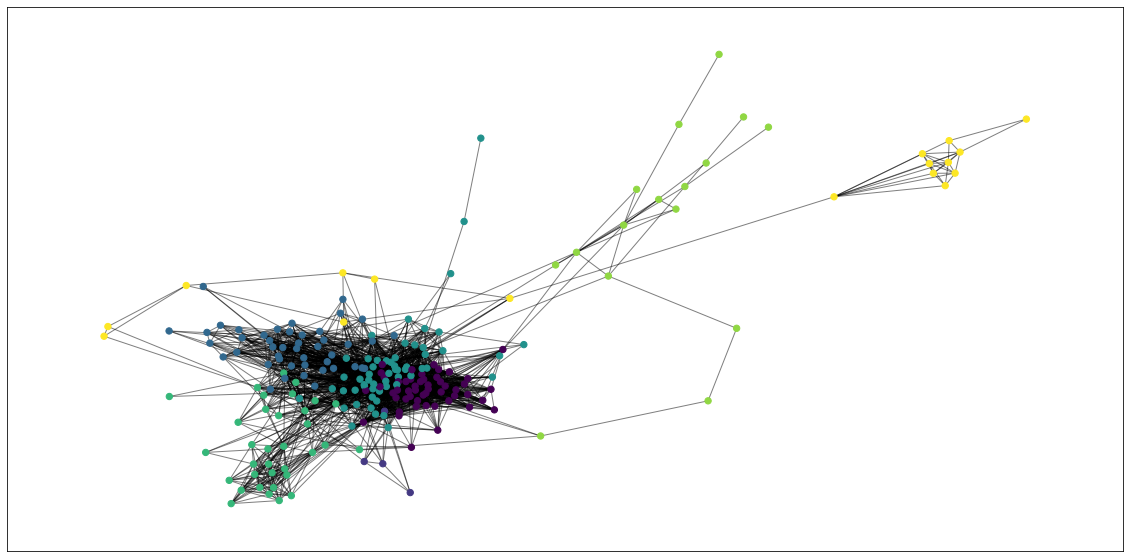

In [8]:
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [9]:
df_communities_statistics = df_communities.groupby("communities").count().sort_values("nodes", ascending=False).reset_index()
sorted_communities = list(df_communities_statistics.communities)
df_communities_statistics["communities"] = ["Community "+str(df_communities_statistics["communities"][x]) for x in range(len(df_communities_statistics))]
df_communities_statistics

communities  nodes
0  Community 3     57
1  Community 0     51
2  Community 2     45
3  Community 4     34
4  Community 6     17
5  Community 5     16
6  Community 1      4

Text(0.5, 1.0, 'Number of nodes per communities')

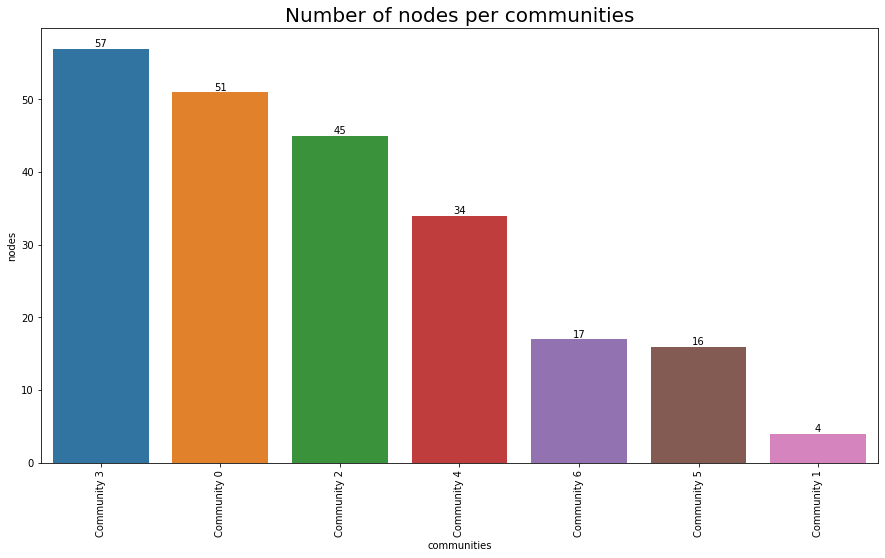

In [10]:
plt.figure(figsize=(15,8))
#define the plot
ax = sns.barplot(x="communities",y="nodes", data=df_communities_statistics)

#attach the value of each bar
ax.bar_label(ax.containers[0])

#rotate the label on X axis in order to allow to read each value
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

#set the title of the plot
ax.set_title("Number of nodes per communities", fontsize = 20)

# Communities analysis

In [11]:
featnames = pd.read_csv("data/348.featnames",header=None,delim_whitespace=True)
feat = pd.read_csv("data/348.feat", sep= " ", names= ["node",]+ list(range(161))).set_index("node")
feat.columns = featnames[1].to_list()
feat = feat.reset_index()
feat

node  birthday;anonymized  birthday;anonymized  birthday;anonymized  \
0     349                    0                    0                    0   
1     350                    0                    0                    0   
2     351                    0                    0                    0   
3     352                    0                    0                    0   
4     353                    0                    0                    0   
..    ...                  ...                  ...                  ...   
222   568                    0                    0                    0   
223   569                    0                    0                    0   
224   570                    0                    0                    0   
225   571                    0                    0                    0   
226   572                    0                    0                    0   

     birthday;anonymized  birthday;anonymized  birthday;anonymized  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      1                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
..                   ...                  ...                  ...   
222                    0                    0                    0   
223                    0                    0                    1   
224                    0                    0                    0   
225                    0                    0                    0   
226                    0                    0                    0   

     birthday;anonymized  birthday;anonymized  birthday;anonymized  ...  \
0                      0                    0                    0  ...   
1                      1                    0                    0  ...   
2                      0                    0                    0  ...   
3                      0                    0                    0  ...   
4                      0                    0                    1  ...   
..                   ...                  ...                  ...  ...   
222                    0                    0                    0  ...   
223                    0                    0                    0  ...   
224                    0                    0                    0  ...   
225                    0                    0                    0  ...   
226                    0                    0                    0  ...   

     work;position;id;anonymized  work;position;id;anonymized  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
..                           ...                          ...   
222                            0                            0   
223                            0                            0   
224                            0                            0   
225                            0                            0   
226                            0                            0   

     work;start_date;anonymized  work;start_date;anonymized  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   
..                          ...                         ...   
222                           0                           0   
223                           0                           0   
22

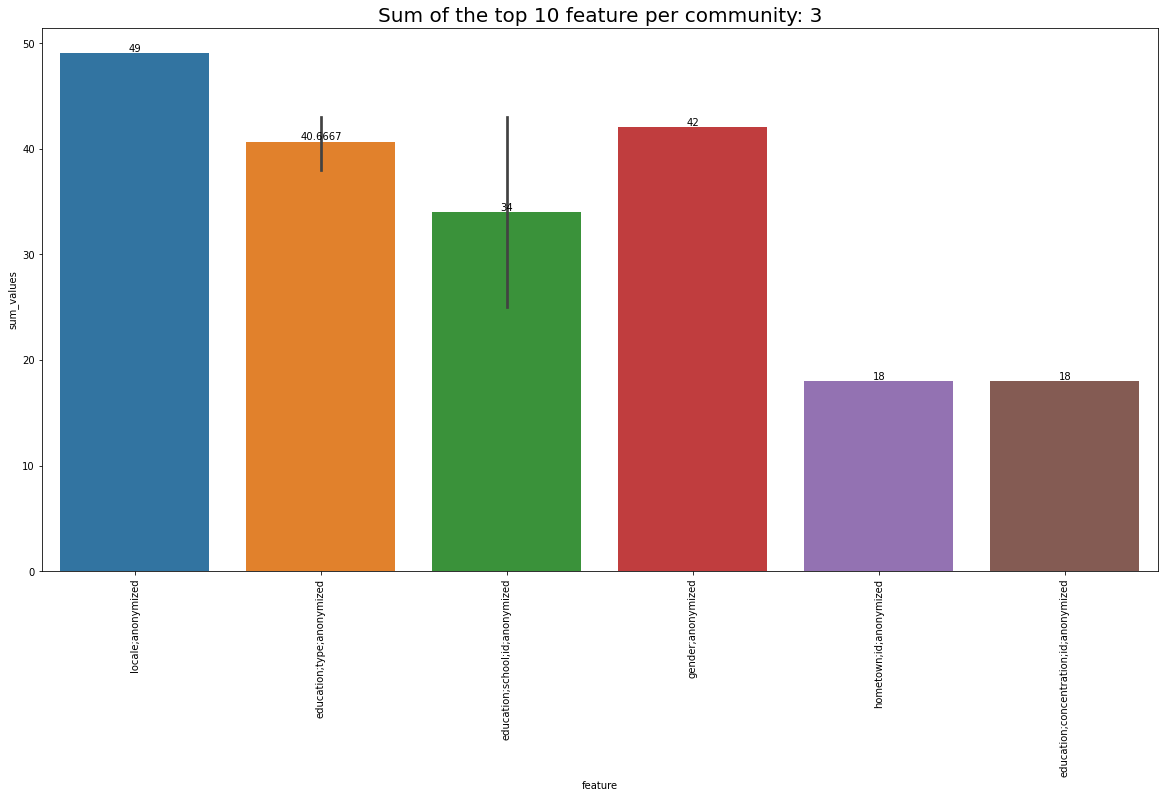

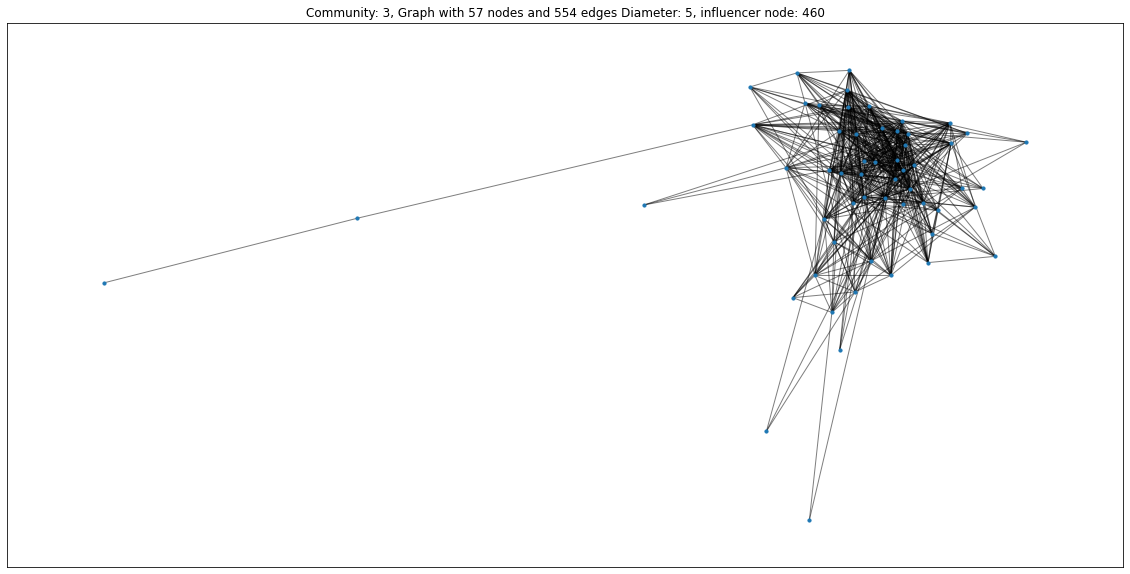

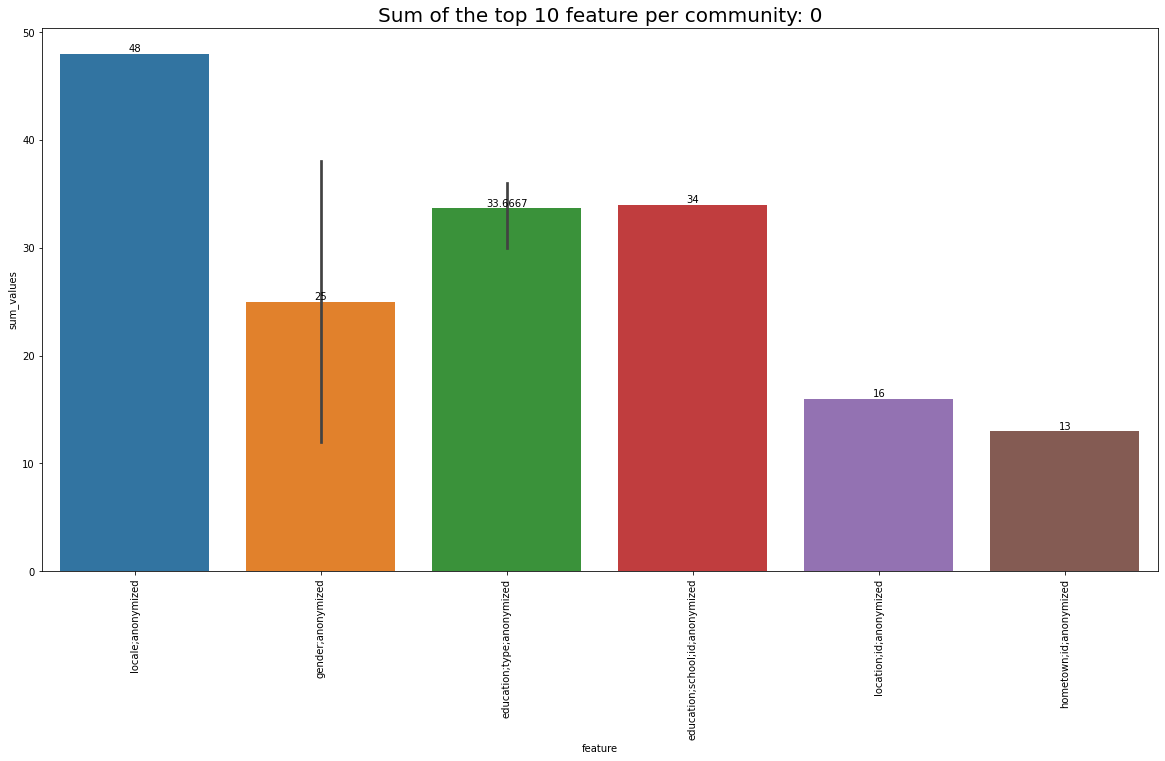

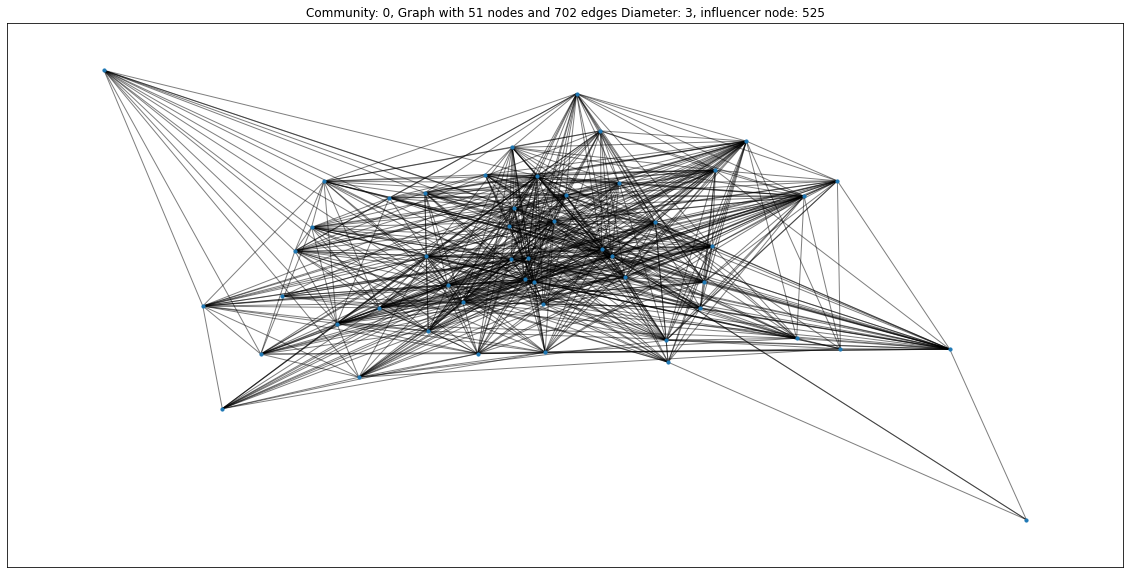

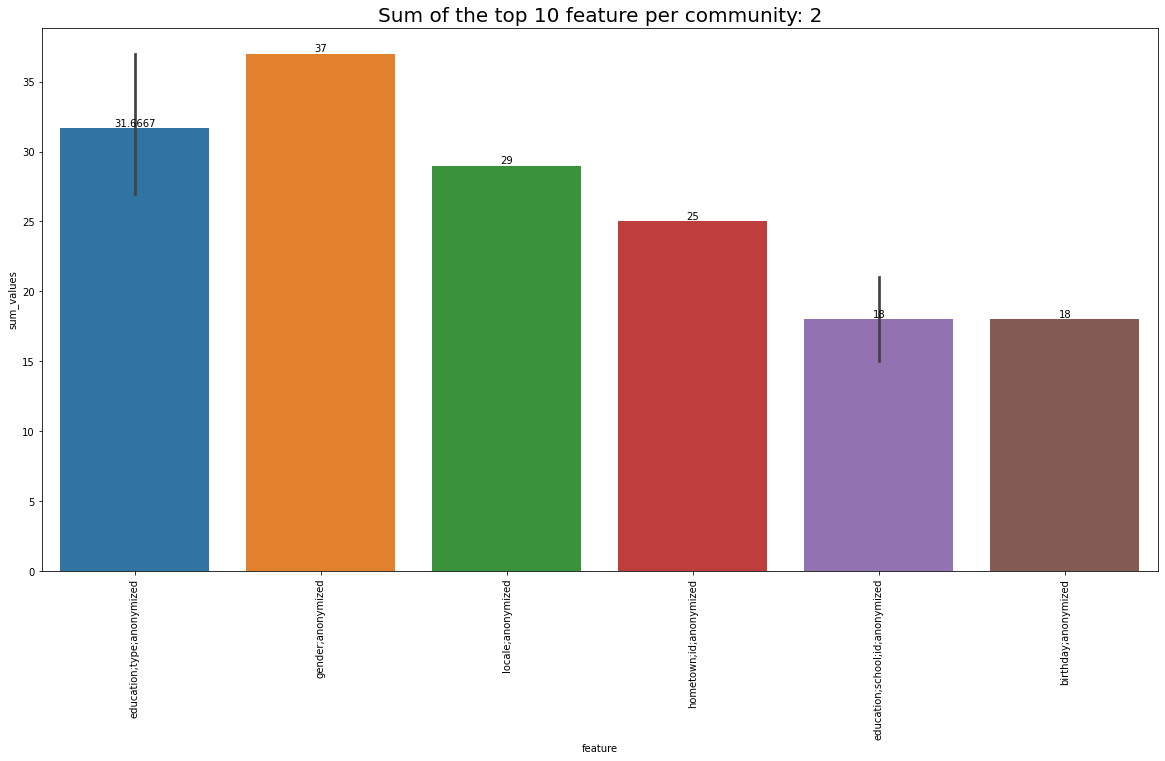

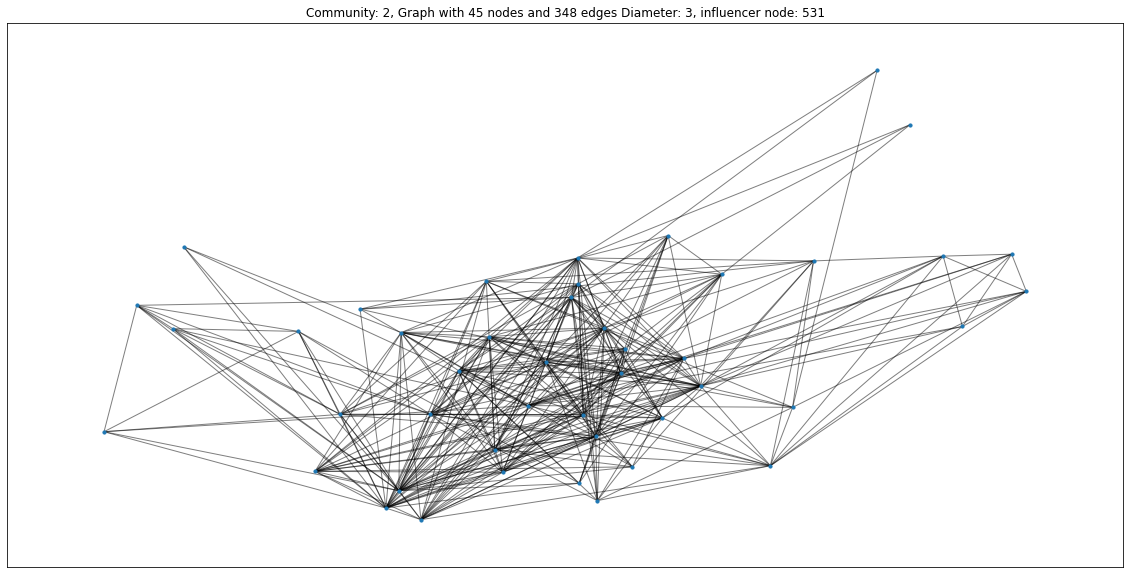

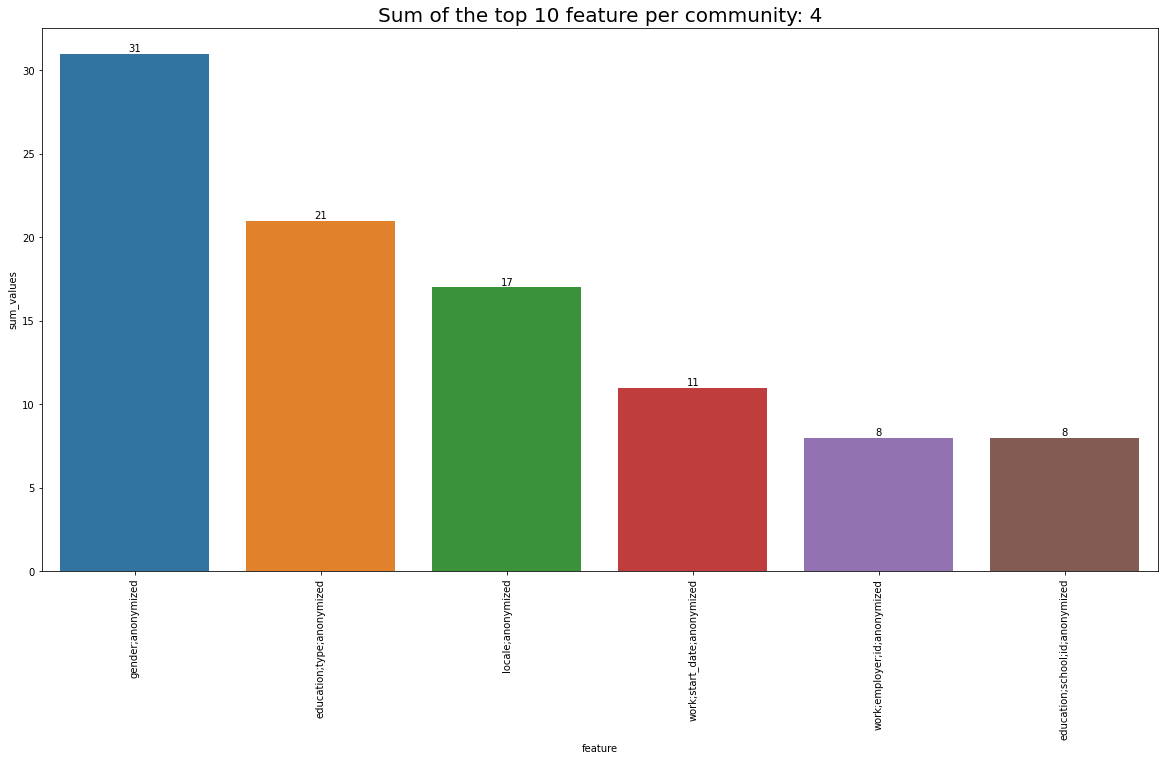

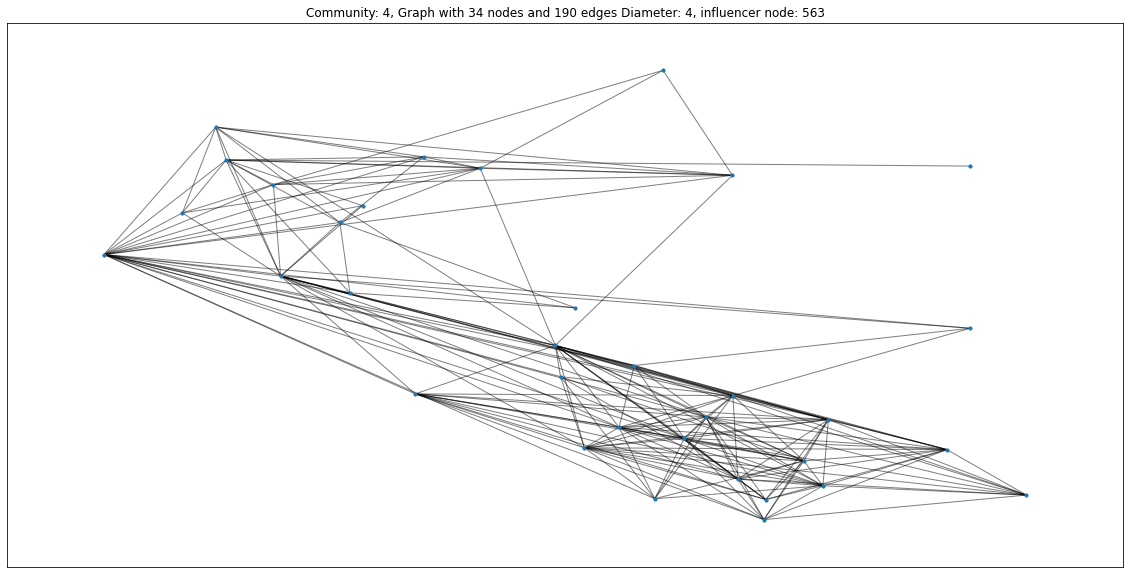

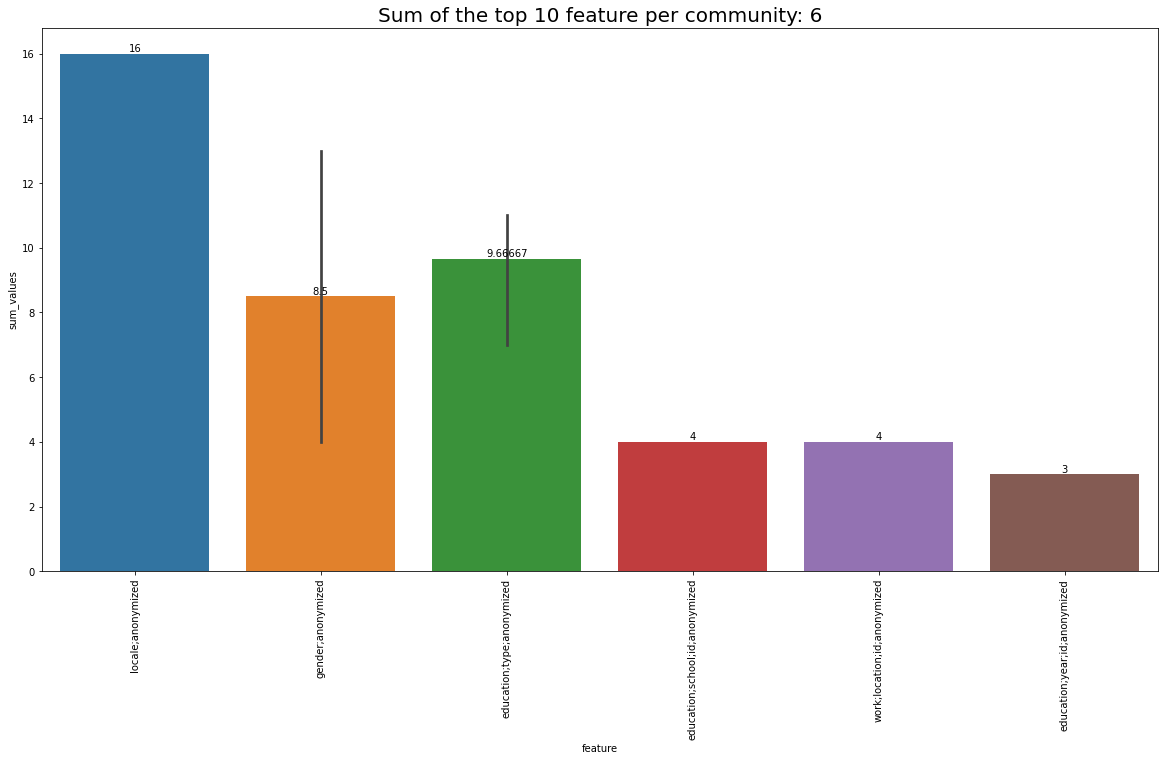

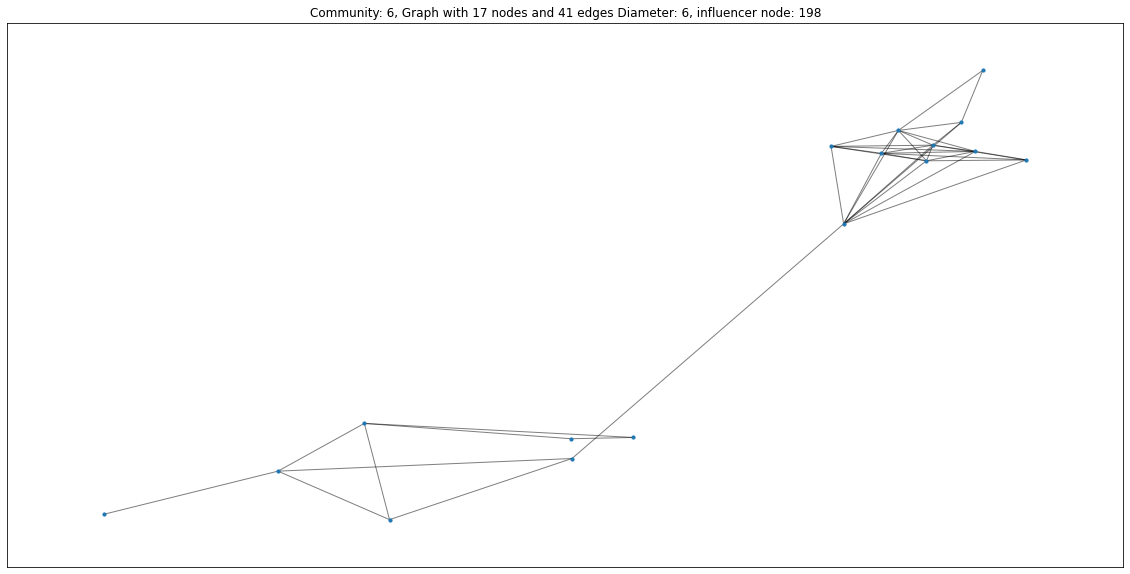

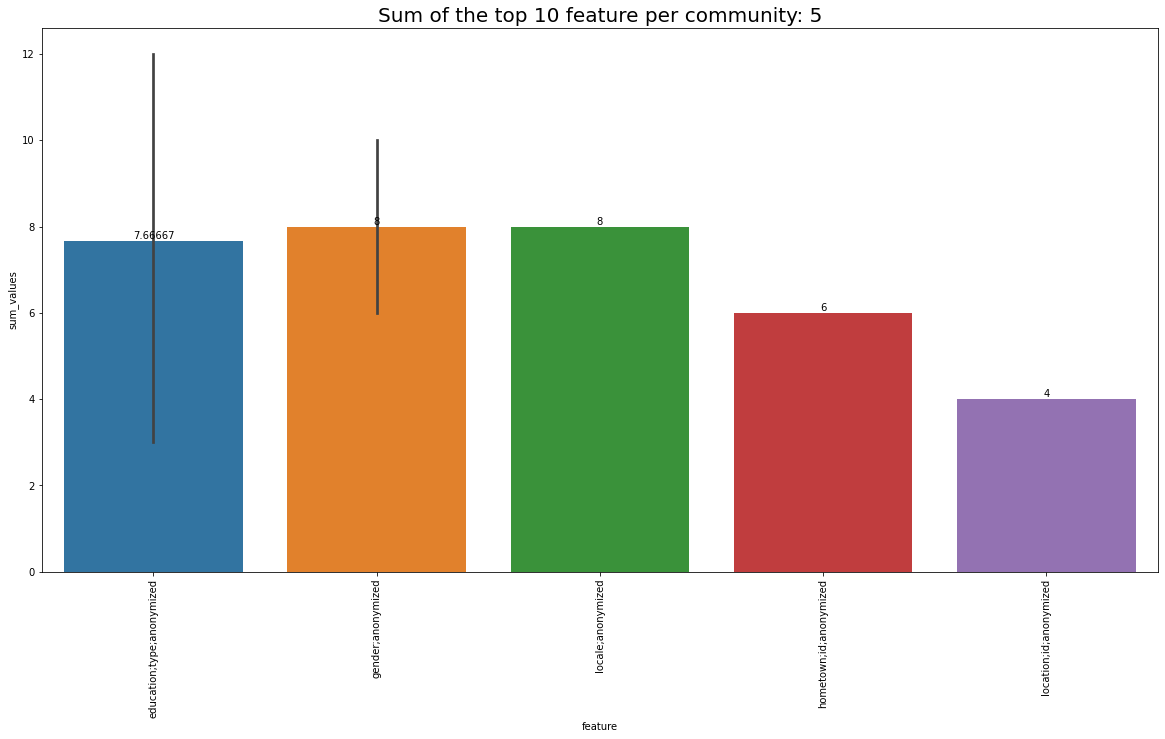

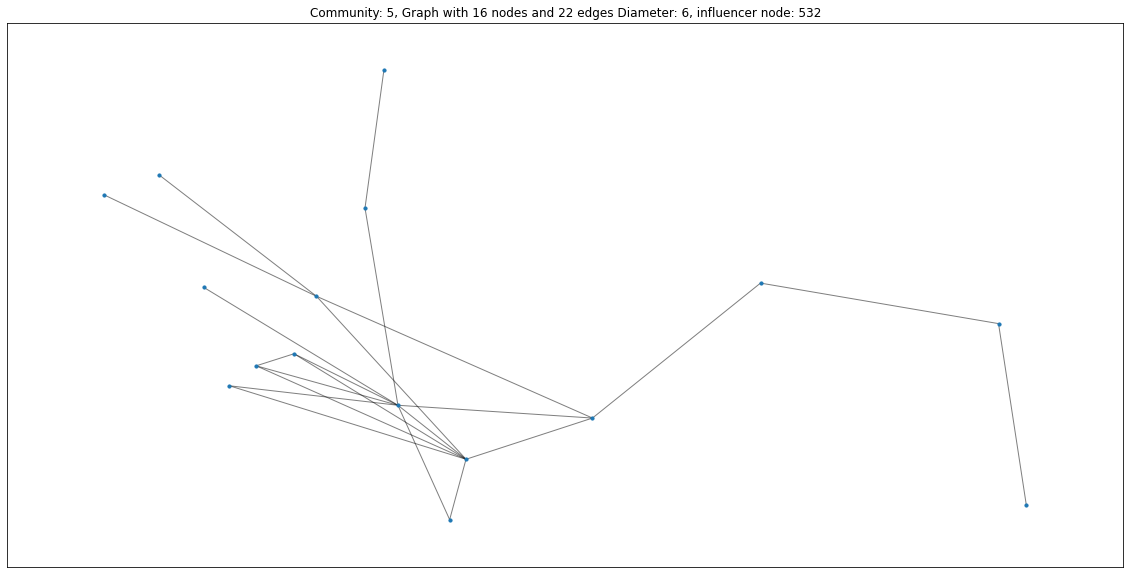

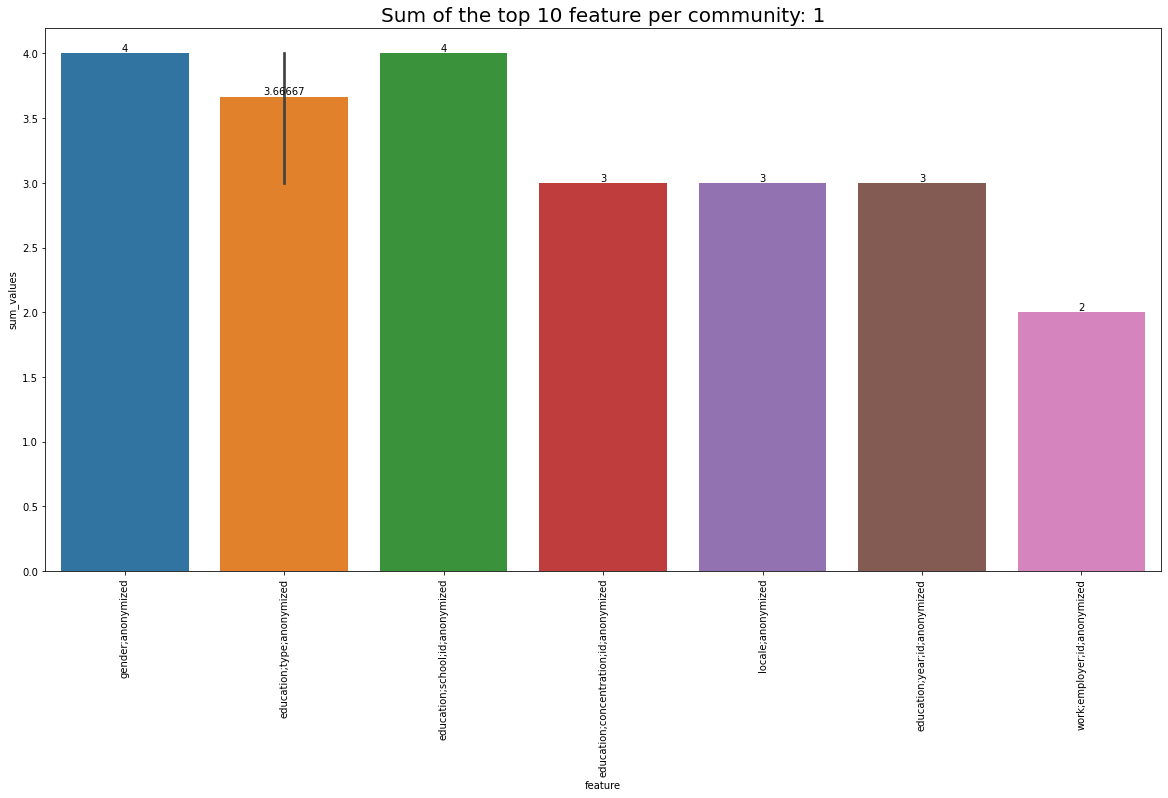

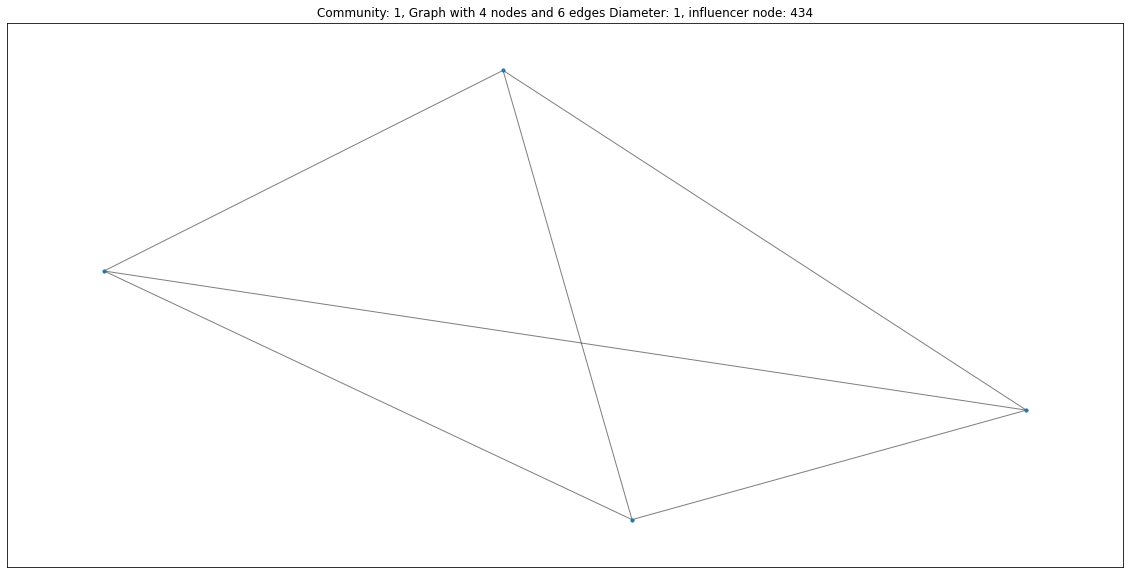

In [12]:
df_communities_statistics = ut.communities_statistics(df_communities,sorted_communities,feat,G)